In [1]:
import main
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time
import sklearn
import keras

Using TensorFlow backend.


# MNIST Using ANN Network

In [11]:
import main
import keras

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255
#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create model
model = main.ANN(
        network_sizes = [100,50],
        loss = 'categorical_crossentropy', 
        optimizer = 'adam',
        activation = 'relu',
        metrics = ['accuracy'],
        n_out = 10
        )    

#Train model
model.fit_model(
        x_train.reshape(-1,(28*28)).astype('float32'),
        y_train,
        batch_size = 400,
        epochs = 4,
        validation_split = 0.01
        )

#Evaluate model
model.eval(
        x_test.reshape(-1,(28*28)).astype('float32'),
        y_test
        )

Train on 59400 samples, validate on 600 samples
Epoch 1/4
59400/59400 [==============================] - 2s 31us/step - loss: 0.4630 - acc: 0.8605 - val_loss: 0.1710 - val_acc: 0.9633
Epoch 2/4
59400/59400 [==============================] - 1s 20us/step - loss: 0.1563 - acc: 0.9548 - val_loss: 0.1441 - val_acc: 0.9683
Epoch 3/4
59400/59400 [==============================] - 1s 20us/step - loss: 0.1047 - acc: 0.9694 - val_loss: 0.1490 - val_acc: 0.9650
Epoch 4/4
10000/10000 [==============================] - 0s 25us/step


[0.10116979364790023, 0.9679]

Loss evolution


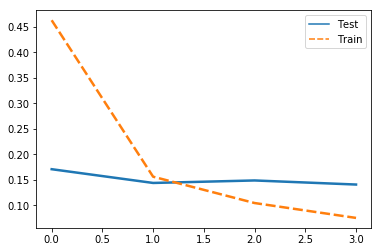

In [12]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


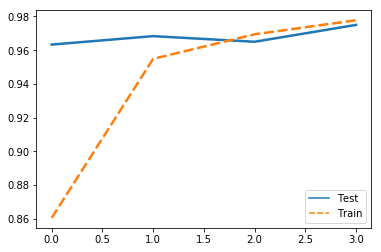

In [13]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


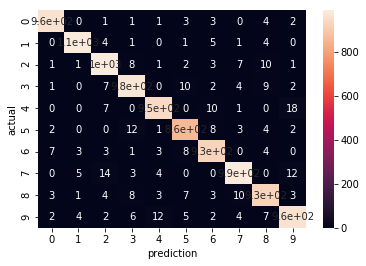

In [14]:
print('Model evalutaion')
model.plot_logits(x_test.reshape(-1,(28*28)),y_test)

# MNIST Using CNN Network

In [4]:
import keras
import main

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255

#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = main.CNN(
        network_sizes = [50,25],
        filters = [5,5],
        kernels = [(4,4),(2,2)],
        pool_size = (2,2),
        activation='relu',
        dropout=0,
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
        n_out = 10
    )

model.fit_model(
        x = x_train.reshape(-1,28,28,1),
        y = y_train,
        batch_size = 200,
        epochs = 5,
        validation_split = 0.01,
        verbose = 1
)

Train on 59400 samples, validate on 600 samples
Epoch 1/5
59400/59400 [==============================] - 21s 359us/step - loss: 0.3798 - acc: 0.8951 - val_loss: 0.1235 - val_acc: 0.9683
Epoch 2/5
59400/59400 [==============================] - 20s 342us/step - loss: 0.0875 - acc: 0.9741 - val_loss: 0.1144 - val_acc: 0.9783
Epoch 3/5
59400/59400 [==============================] - 20s 334us/step - loss: 0.0559 - acc: 0.9835 - val_loss: 0.1250 - val_acc: 0.9717
Epoch 4/5
59400/59400 [==============================] - 18s 310us/step - loss: 0.0428 - acc: 0.9868 - val_loss: 0.1003 - val_acc: 0.9800
Epoch 5/5
59400/59400 [==============================] - 18s 301us/step - loss: 0.0326 - acc: 0.9907 - val_loss: 0.0888 - val_acc: 0.9833


Loss evolution


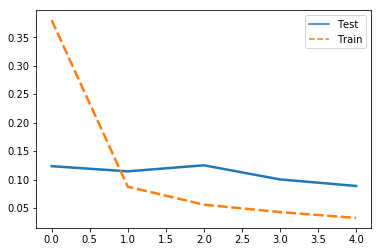

In [5]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


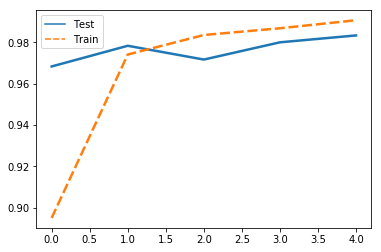

In [6]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


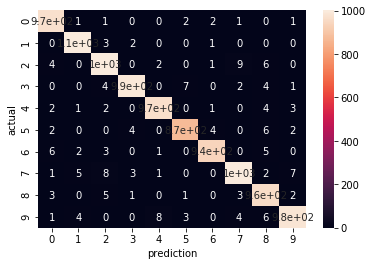

In [7]:
print('Model evalutaion')
model.plot_logits(x_test.reshape(-1,28,28,1),y_test)

# MNIST Using RNN Network

In [ ]:
import main
import keras

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255

#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = main.RNN(
    network_sizes = [30,15],
    lstm_cells = [28],
    activation='relu',
    rnn_type = 'GRU',
    dropout = 0.1,
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    n_out = 10
)

model.fit_model(
    x = x_train,
    y = y_train,
    batch_size = 200,
    epochs = 10,
    validation_split = 0.01,
    verbose = 1
)



Train on 59400 samples, validate on 600 samples
Epoch 1/10
59400/59400 [==============================] - 8s 143us/step - loss: 1.7272 - acc: 0.3655 - val_loss: 1.1002 - val_acc: 0.5667
Epoch 2/10
59400/59400 [==============================] - 7s 119us/step - loss: 1.0895 - acc: 0.5960 - val_loss: 0.6817 - val_acc: 0.7433
Epoch 3/10
59400/59400 [==============================] - 6s 102us/step - loss: 0.8025 - acc: 0.7120 - val_loss: 0.4841 - val_acc: 0.8167
Epoch 4/10
59400/59400 [==============================] - 6s 102us/step - loss: 0.5867 - acc: 0.7976 - val_loss: 0.3255 - val_acc: 0.8933
Epoch 5/10
59400/59400 [==============================] - 6s 103us/step - loss: 0.4338 - acc: 0.8604 - val_loss: 0.2617 - val_acc: 0.9233
Epoch 6/10
59400/59400 [==============================] - 6s 102us/step - loss: 0.3499 - acc: 0.8913 - val_loss: 0.1878 - val_acc: 0.9517
Epoch 7/10
13200/59400 [=====>........................] - ETA: 4s - loss: 0.3171 - acc: 0.9000

Loss evolution


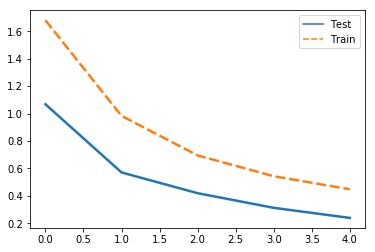

In [2]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


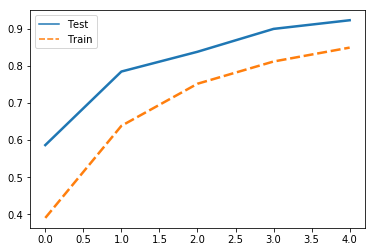

In [3]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


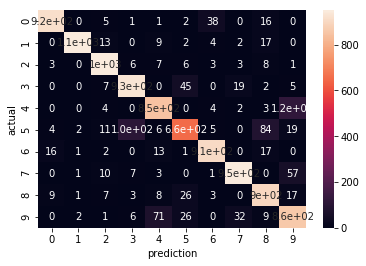

In [5]:
print('Model evalutaion')
model.plot_logits(x_test,y_test)

# Multistep RNN

In [9]:
import main
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n = 500000

points = np.linspace(start = 0,stop = 1.5*n/25 * np.pi, num = n)

x = np.sin(points[:-25])

y = np.sin(points[25:])

X = x.reshape(-1,25,1)
Y = y.reshape(-1,25,1)

x_train,x_test,y_train,y_test = train_test_split(X, Y, shuffle = False,test_size = 0.10)

model = main.RNN_multistep(
    network_sizes = [30,15],
    lstm_cells = [20,10],
    activation='tanh',
    rnn_type = 'lstm',
    dropout = 0.2,
    crop = (10,0),
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = None,
    n_out = 1  
)

model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 500,
    epochs = 30,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

pred = model.predict(x_test)

Train on 17999 samples, validate on 2000 samples
Epoch 1/30
17999/17999 [==============================] - 5s 274us/step - loss: 0.6097 - val_loss: 0.0527
Epoch 2/30
17999/17999 [==============================] - 2s 126us/step - loss: 0.2274 - val_loss: 0.0322
Epoch 3/30
17999/17999 [==============================] - 2s 125us/step - loss: 0.1659 - val_loss: 0.0212
Epoch 4/30
17999/17999 [==============================] - 3s 172us/step - loss: 0.1261 - val_loss: 0.0145
Epoch 5/30
17999/17999 [==============================] - 2s 132us/step - loss: 0.0956 - val_loss: 0.0125
Epoch 6/30
17999/17999 [==============================] - 2s 135us/step - loss: 0.0780 - val_loss: 0.0121
Epoch 7/30
17999/17999 [==============================] - 3s 164us/step - loss: 0.0675 - val_loss: 0.0116
Epoch 8/30
17999/17999 [==============================] - 3s 150us/step - loss: 0.0609 - val_loss: 0.0113
Epoch 9/30
17999/17999 [==============================] - 3s 141us/step - loss: 0.0551 - val_loss: 0.01

In [34]:
model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 500,
    epochs = 60,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

Train on 18999 samples, validate on 1000 samples
Epoch 1/60
18999/18999 [==============================] - 2s 89us/step - loss: 0.0020 - val_loss: 0.0066
Epoch 2/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0021 - val_loss: 0.0077
Epoch 3/60
18999/18999 [==============================] - 2s 85us/step - loss: 0.0019 - val_loss: 0.0062
Epoch 4/60
18999/18999 [==============================] - 2s 85us/step - loss: 0.0021 - val_loss: 0.0078
Epoch 5/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0021 - val_loss: 0.0077
Epoch 6/60
18999/18999 [==============================] - 2s 88us/step - loss: 0.0018 - val_loss: 0.0058
Epoch 7/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0021 - val_loss: 0.0074
Epoch 8/60
18999/18999 [==============================] - 2s 87us/step - loss: 0.0021 - val_loss: 0.0064
Epoch 9/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0018 - val_loss: 0.0071
Epoch 

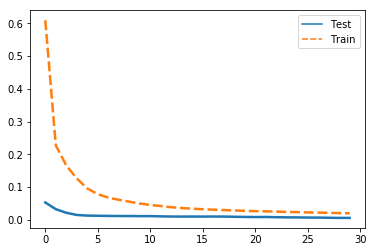

In [10]:
model.plot_loss()

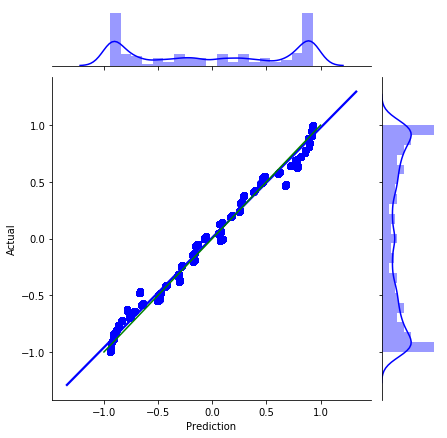

In [11]:
model.plot_scatter(x_test,y_test)

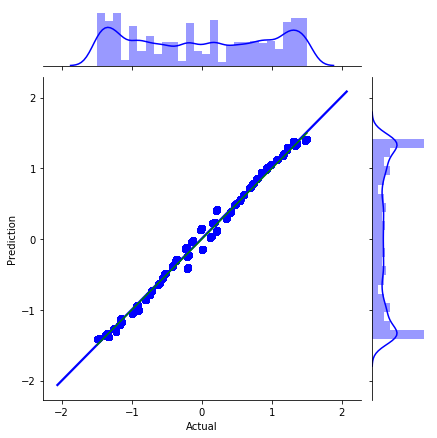

In [12]:
model.plot_scatter_var(x_test,y_test)

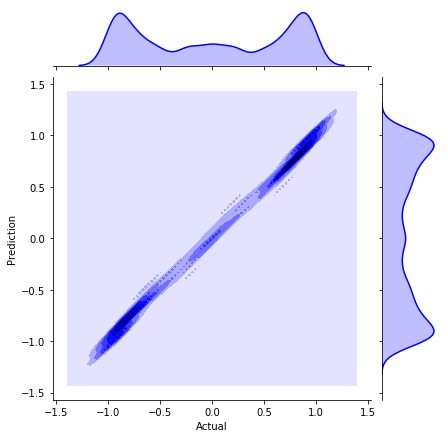

In [5]:
import seaborn as sns


sns.jointplot(x=pred.reshape(-1), y=y_test[:,10:].reshape(-1),
              kind='kde', color='b').set_axis_labels('Actual','Prediction')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x_test.reshape(-1),y_test.reshape(-1))

0.9919397307605031

In [22]:
y_test.shape

(1000, 25, 1)

In [23]:
pred.shape

(1000, 15, 1)

In [12]:
pred.shape

(4000, 15, 1)

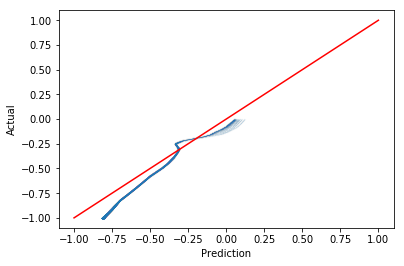

In [9]:
plt.scatter(pred.reshape(-1),y_test[:,10:].reshape(-1),alpha = 0.1,s=0.05)

mini = np.min([np.min(pred),np.min(y)])
maxi = np.max([np.max(pred),np.max(y)])

plt.plot([mini,maxi],[mini,maxi],color='red')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

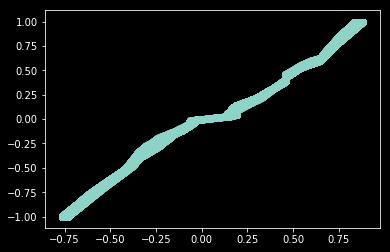

In [10]:
plt.scatter(pred.reshape(-1),y_test[:,10:].reshape(-1))
plt.show()

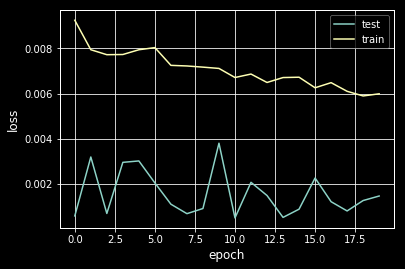

In [44]:
for i in model.history.history.keys():
    plt.plot(model.history.history[i][40:])

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['test', 'train'], loc='upper right')

plt.style.use(['dark_background'])

In [28]:
model.history.history

{'val_loss': [0.025741638615727425,
  0.0005313390283845365,
  0.0071670981124043465,
  0.01764088310301304,
  0.020384879782795906,
  0.013412934727966785,
  0.011212036944925785,
  0.01622069627046585,
  0.013001222163438797,
  0.007025196682661772,
  0.005903164856135845,
  0.005283550824970007,
  0.004348976071923971,
  0.004083418752998114,
  0.002927143359556794,
  0.0023187631741166115,
  0.003269028151407838,
  0.0031798360869288445,
  0.0019922135397791862,
  0.0015836185775697231,
  0.0016573758330196142,
  0.0019760080613195896,
  0.001405745162628591,
  0.002135824179276824,
  0.0011486340081319213,
  0.002733205445110798,
  0.003116999752819538,
  0.001530751003883779,
  0.0010128740686923265,
  0.004288343247026205,
  0.002447637729346752,
  0.0024640955962240696,
  0.0020193839445710182,
  0.0007428936660289764,
  0.0006920854793861508,
  0.0006538060260936618,
  0.0045179459266364574,
  0.0026154296938329935,
  0.0005986756877973676,
  0.0015634548617526889,
  0.0005916

In [14]:
x_train.shape

(18999, 25, 1)

In [15]:
points.shape

(500000,)

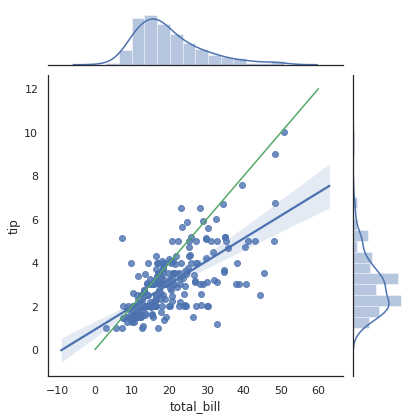

In [8]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')
plt.plot([0,60],[0,12],'g')

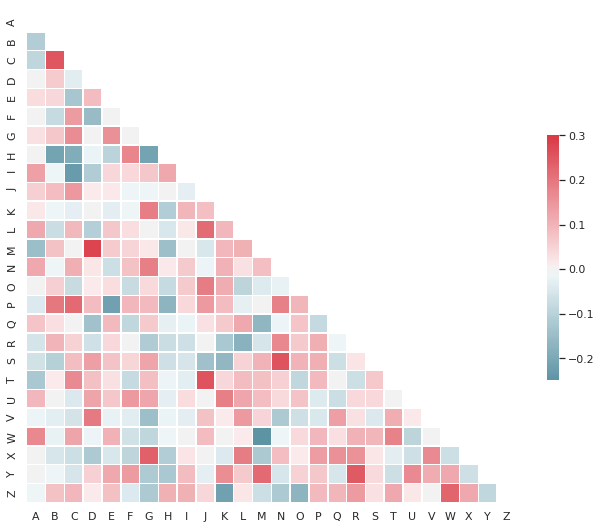

In [6]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],columns=['dogs', 'cats'])

df.corr()

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


In [21]:
x = np.array(['a','e','a','u','a'])
y = np.array (['e','a','a','u','a'])

def count(x,y):
    labels = np.unique(np.concatenate([x,y]))
    dic = {i:{j:0 for j in labels} for i in labels}
    
    for i in unique:
        for j in unique:
            
            
    return dic

count(x,y)

{'a': {'a': 0, 'e': 0, 'u': 0},
 'e': {'a': 0, 'e': 0, 'u': 0},
 'u': {'a': 0, 'e': 0, 'u': 0}}

In [22]:
np.(x,y)

NotImplemented

In [19]:
import pandas as pd

d = {'a':{'a':1,'b':2},'b':{'a':3,'b':4}}

pd.DataFrame(d)
     

,a,b
a,1,3
b,2,4


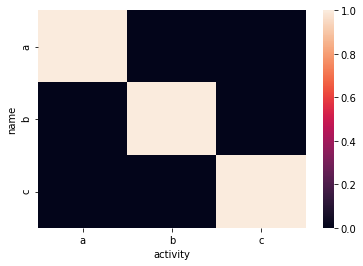

In [51]:
import seaborn as sns

df = pd.DataFrame({'name':['a','b','c'],'activity':['a','b','c']})

c = df.groupby('name')['activity'].value_counts().unstack().fillna(0)

sns.heatmap(c)

In [36]:
import keras
#keras.utils.to_categorical(np.array([1,2,3,1]), 3)
keras.utils.to_categorical(y_train, 10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)